In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [9]:
online_shop_intention_data = pd.read_csv('DATASET\online_shoppers_intention.csv')
online_shop_intention_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\asusA\AppData\Local\Temp\ipykernel_4824\3254283042.py:1: SyntaxWarning: invalid escape sequence '\o'
  online_shop_intention_data = pd.read_csv('DATASET\online_shoppers_intention.csv')


In [10]:
selected_column = ['Month', 'VisitorType']
online_shop_intention_data = pd.get_dummies(online_shop_intention_data, columns=selected_column)
online_shop_intention_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

EDA

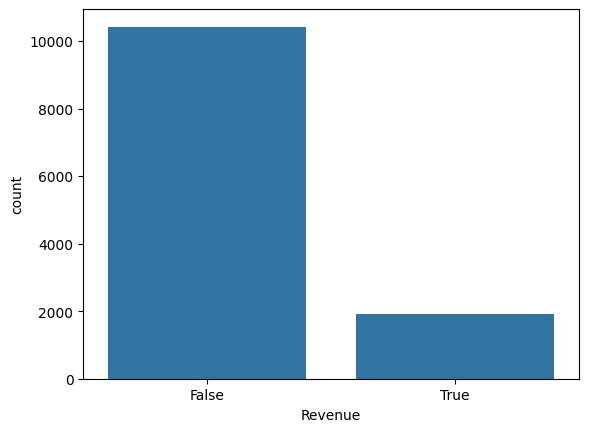

In [11]:
sns.countplot(data=online_shop_intention_data, x='Revenue')
plt.show()

#Karena data revenue tidak seimbang, pemodelan nanti harus menggunakan "class_weight='balanced'"

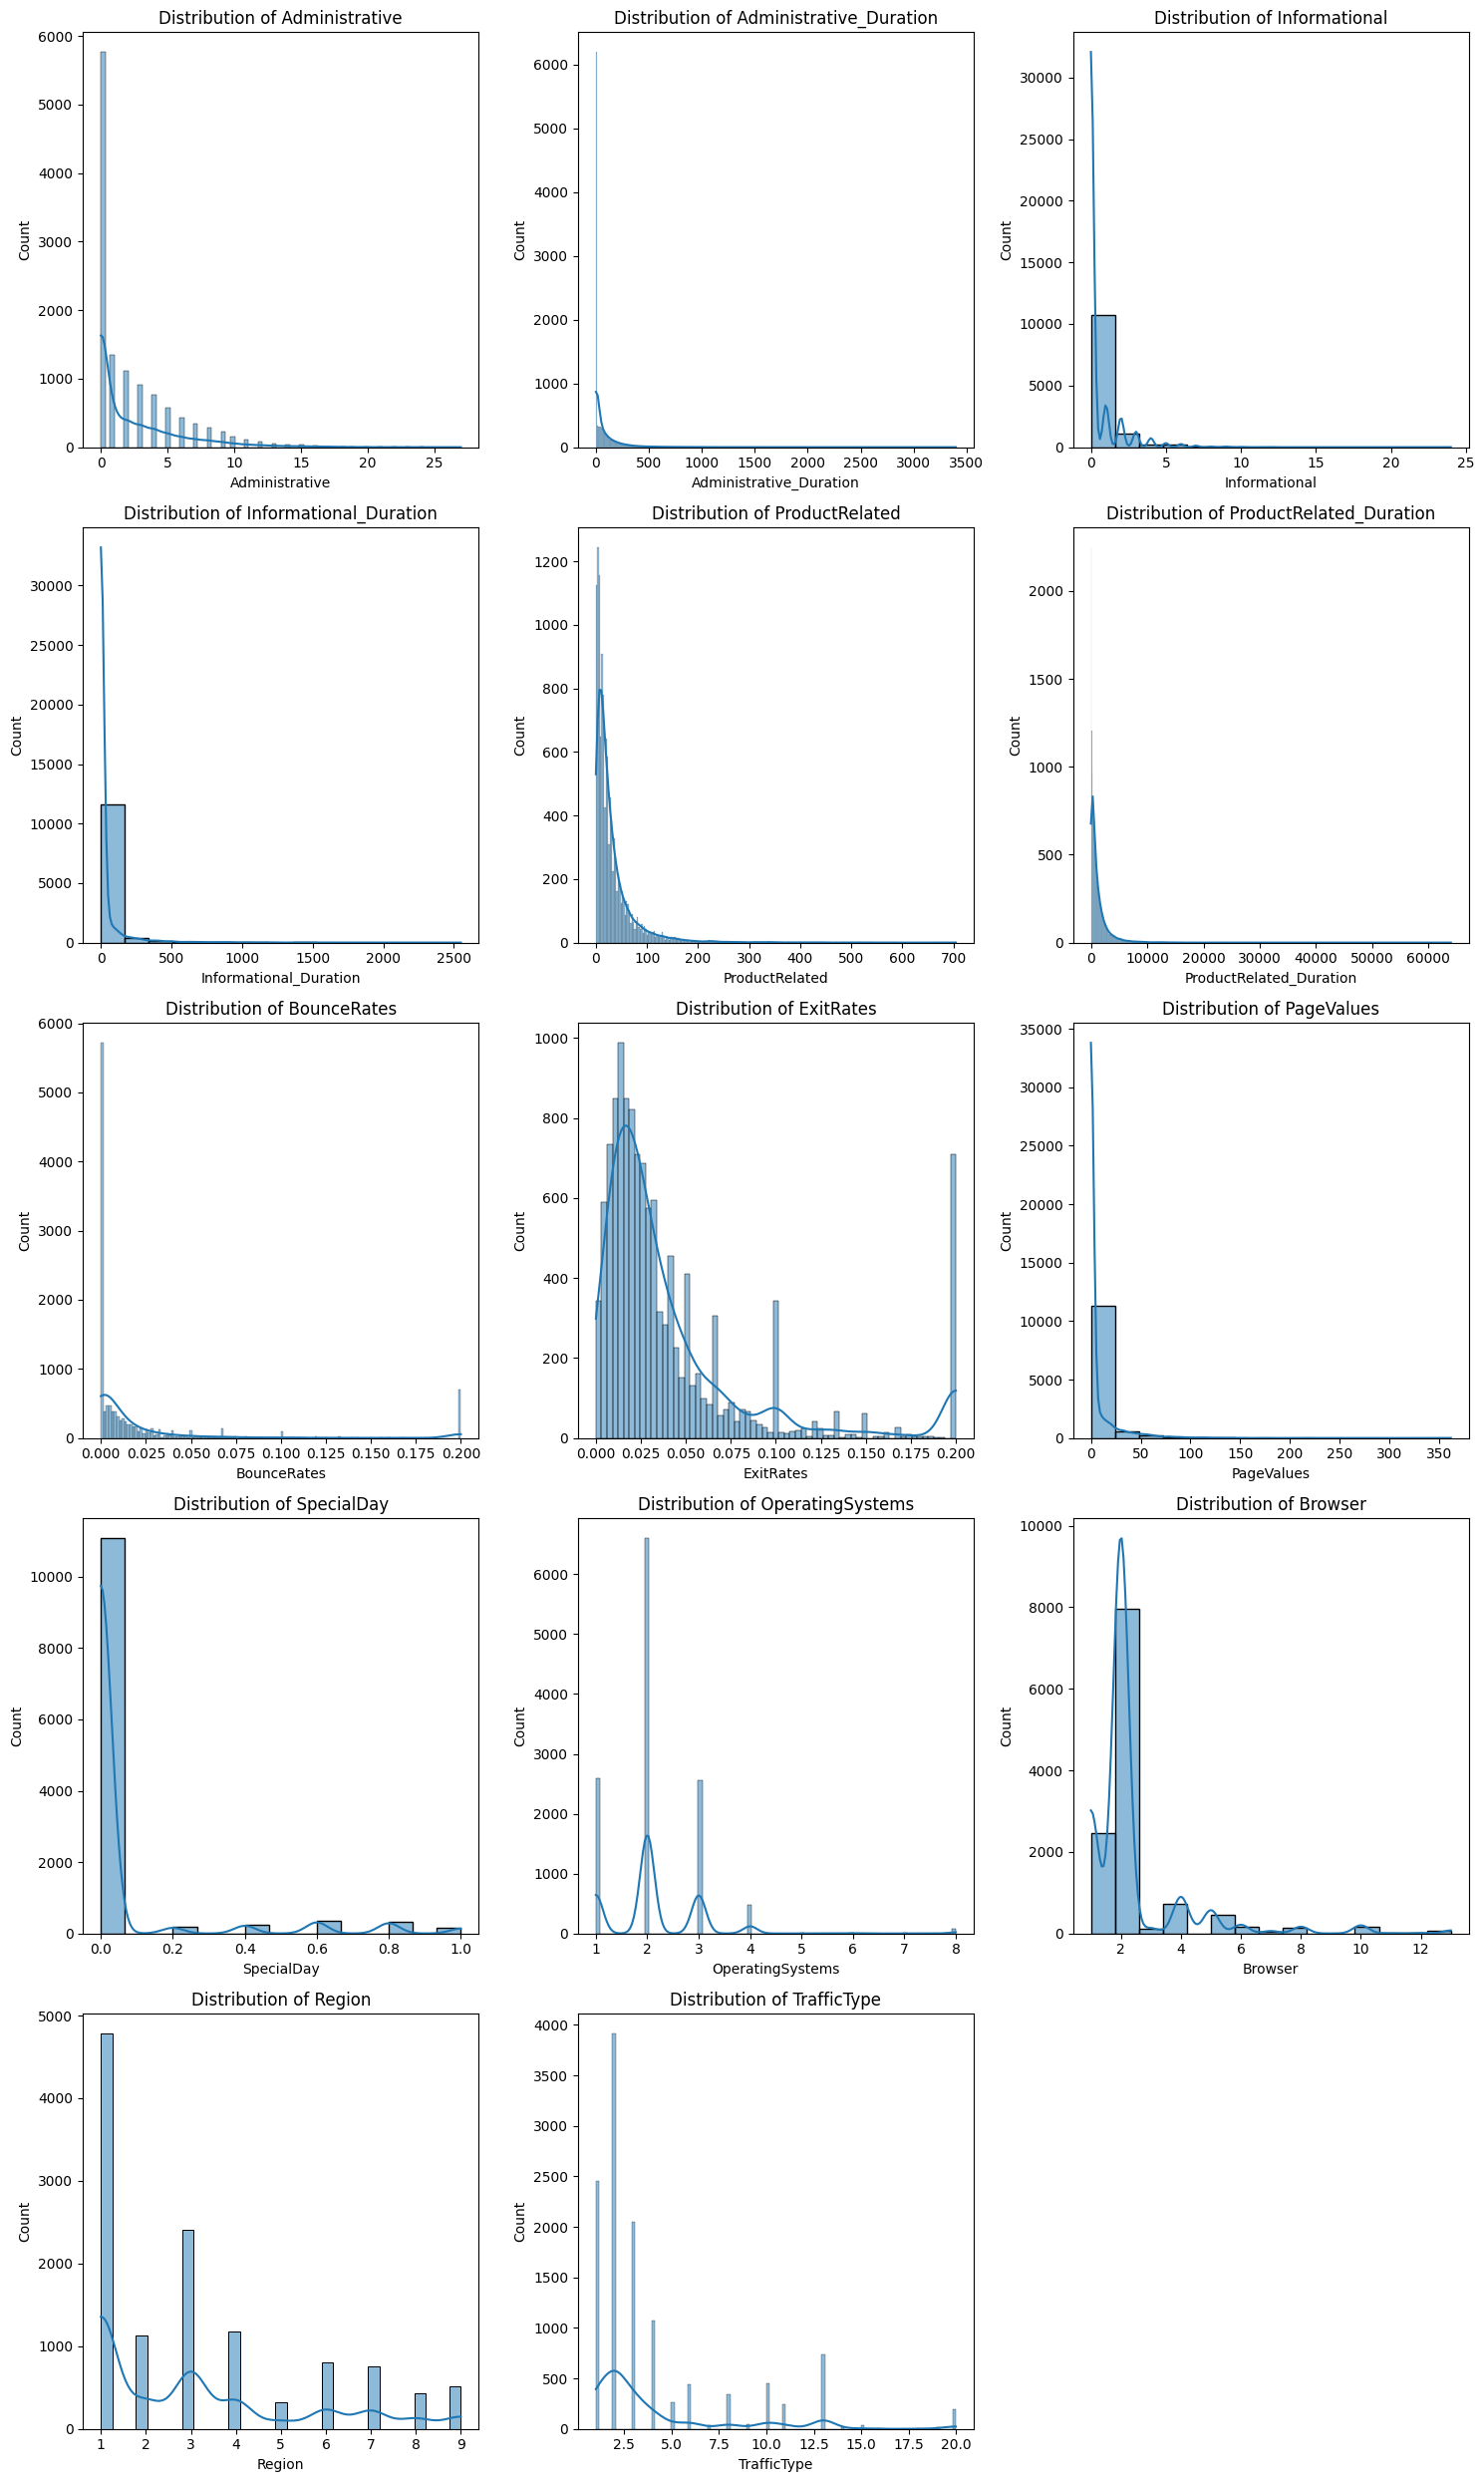

In [12]:
numeric_column_to_plot = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']

n_cols = 3
n_rows = (len(numeric_column_to_plot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

#looping untuk setiap kolom untuk setiap histogram
for i, column in enumerate(numeric_column_to_plot):
    sns.histplot(data=online_shop_intention_data, x=column, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Menghilangkan axes kosong jika jumlah plot tidak genap
for j in range(len(numeric_column_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Make a Models using RandomForest

In [13]:
X = online_shop_intention_data.drop('Revenue', axis=1)
y = online_shop_intention_data['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))

Jumlah data latih: 9864
Jumlah data uji: 2466


In [14]:
model = RandomForestClassifier(random_state=42, class_weight='balanced')

params_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=params_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)

print('Proses grid search selesai!')

Fitting 5 folds for each of 81 candidates, totalling 405 fits


Proses grid search selesai!


In [15]:
print('Parameter terbaik:', grid_search.best_params_)

Parameter terbaik: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [16]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Akurasi model:', accuracy)
conf_mtrx = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n')
print(conf_mtrx)
clas_report = classification_report(y_test, y_pred)
print('Classification Report:\n')
print(clas_report)

Akurasi model: 0.8941605839416058
Confusion Matrix:

[[1935  120]
 [ 141  270]]
Classification Report:

              precision    recall  f1-score   support

       False       0.93      0.94      0.94      2055
        True       0.69      0.66      0.67       411

    accuracy                           0.89      2466
   macro avg       0.81      0.80      0.81      2466
weighted avg       0.89      0.89      0.89      2466

